In [33]:
import pandas as pd
import numpy as np

In [15]:
occs = pd.read_csv('./data/Occupation_WFH/CBSA_OCC_all_data_M_2019.csv')
occs = occs[['cbsa','occ_code', 'occ_title', 'o_group','tot_emp','jobs_1000_orig']]
occs

cbsa occ_code                                          occ_title  \
0       10180  11-0000                             Management Occupations   
1       10180  13-0000      Business and Financial Operations Occupations   
2       10180  15-0000              Computer and Mathematical Occupations   
3       10180  17-0000           Architecture and Engineering Occupations   
4       10180  19-0000     Life, Physical, and Social Science Occupations   
...       ...      ...                                                ...   
133971  49740  53-7062  Laborers and Freight, Stock, and Material Move...   
133972  49740  53-7064                        Packers and Packagers, Hand   
133973  49740  53-7065                         Stockers and Order Fillers   
133974  49740  53-7081          Refuse and Recyclable Material Collectors   
133975  49740  00-0000                                    All Occupations   

         o_group tot_emp jobs_1000_orig  
0          major   2,670         40.137  
1          major   2,280         34.214  
2          major     630          9.494  
3          major     770         11.600  
4          major     330          5.033  
...          ...     ...            ...  
133971  detailed     730         11.835  
133972  detailed     170          2.682  
133973  detailed     750         12.058  
133974  detailed      80          1.288  
133975     total  61,940       1000.000  

[133976 rows x 6 columns]

In [23]:
wfh  = pd.read_csv('./data/Occupation_WFH/occ_wfh_all_codes.csv')
wfh['occ_code'] = wfh['onetsoccode'].apply(lambda x: x.split('.')[0])
wfh = wfh[['teleworkable', 'occ_code']]
wfh = wfh.groupby('occ_code').mean()
wfh = wfh.reset_index()
wfh

occ_code  teleworkable
0    11-1011           1.0
1    11-1021           1.0
2    11-1031           1.0
3    11-2011           1.0
4    11-2021           1.0
..       ...           ...
893  53-7073           0.0
894  53-7081           0.0
895  53-7111           0.0
896  53-7121           0.0
897  53-7199           0.0

[898 rows x 2 columns]

In [37]:
df = occs.merge(wfh, on='occ_code', how='left')
df['tot_emp'] = df['tot_emp'].apply(lambda x: x.replace(',',''))
df['tot_emp'] = df['tot_emp'].apply(lambda x: int(x) if x != '**' else np.nan)
df

cbsa occ_code                                          occ_title  \
0       10180  11-0000                             Management Occupations   
1       10180  13-0000      Business and Financial Operations Occupations   
2       10180  15-0000              Computer and Mathematical Occupations   
3       10180  17-0000           Architecture and Engineering Occupations   
4       10180  19-0000     Life, Physical, and Social Science Occupations   
...       ...      ...                                                ...   
133971  49740  53-7062  Laborers and Freight, Stock, and Material Move...   
133972  49740  53-7064                        Packers and Packagers, Hand   
133973  49740  53-7065                         Stockers and Order Fillers   
133974  49740  53-7081          Refuse and Recyclable Material Collectors   
133975  49740  00-0000                                    All Occupations   

         o_group  tot_emp jobs_1000_orig  teleworkable  
0          major   2670.0         40.137           NaN  
1          major   2280.0         34.214           NaN  
2          major    630.0          9.494           NaN  
3          major    770.0         11.600           NaN  
4          major    330.0          5.033           NaN  
...          ...      ...            ...           ...  
133971  detailed    730.0         11.835           0.0  
133972  detailed    170.0          2.682           0.0  
133973  detailed    750.0         12.058           0.0  
133974  detailed     80.0          1.288           0.0  
133975     total  61940.0       1000.000           NaN  

[133976 rows x 7 columns]

In [26]:
# df_needs_label = df[df['o_group']=='detailed'].copy()
# df_needs_label = df_needs_label[df_needs_label['teleworkable'].isna()][['occ_code','occ_title','teleworkable']].drop_duplicates()
# df_needs_label.to_csv('./data/Occupation_WFH/unlabeled.csv', index=False)

In [40]:
occ_check = df.copy()
occ_check = occ_check[['occ_code','occ_title','tot_emp']].drop_duplicates()
occ_check = occ_check.groupby(['occ_code','occ_title']).max()
occ_check = occ_check[occ_check['tot_emp'].isna()]
occ_check

tot_emp
occ_code occ_title                                                  
49-9045  Refractory Materials Repairers, Except Brickmasons      NaN
51-2061  Timing Device Assemblers and Adjusters                  NaN

In [42]:
df_maj = df[df['o_group']=='major'].copy()
df_maj

cbsa occ_code                                          occ_title  \
0       10180  11-0000                             Management Occupations   
1       10180  13-0000      Business and Financial Operations Occupations   
2       10180  15-0000              Computer and Mathematical Occupations   
3       10180  17-0000           Architecture and Engineering Occupations   
4       10180  19-0000     Life, Physical, and Social Science Occupations   
...       ...      ...                                                ...   
133744  49740  45-0000         Farming, Fishing, and Forestry Occupations   
133745  49740  47-0000            Construction and Extraction Occupations   
133746  49740  49-0000  Installation, Maintenance, and Repair Occupations   
133747  49740  51-0000                             Production Occupations   
133748  49740  53-0000     Transportation and Material Moving Occupations   

       o_group  tot_emp jobs_1000_orig  teleworkable  
0        major   2670.0         40.137           NaN  
1        major   2280.0         34.214           NaN  
2        major    630.0          9.494           NaN  
3        major    770.0         11.600           NaN  
4        major    330.0          5.033           NaN  
...        ...      ...            ...           ...  
133744   major   6990.0        112.865           NaN  
133745   major   2520.0         40.652           NaN  
133746   major   2770.0         44.740           NaN  
133747   major   2200.0         35.548           NaN  
133748   major   4600.0         74.319           NaN  

[8143 rows x 7 columns]

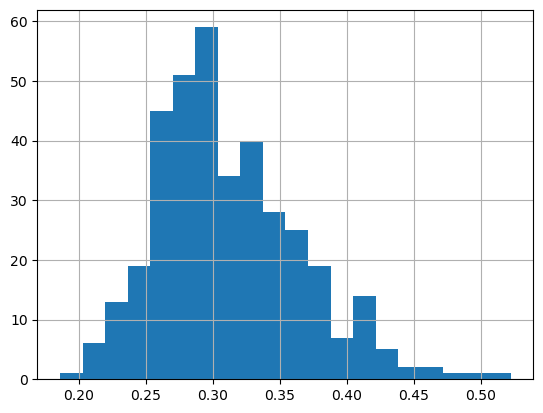

In [56]:
df_min = df[df['o_group']=='detailed'].copy()
df_min['tele_emp'] = df_min['tot_emp'] * df_min['teleworkable']
df_min = df_min[['cbsa','tot_emp','tele_emp']]
df_min = df_min.groupby(['cbsa']).sum()
df_min['wfh_score'] = df_min['tele_emp'] / df_min['tot_emp']
df_min = df_min.reset_index()
df_min = df_min[['cbsa','wfh_score']]
df_min.columns = ['GTCBSA','wfh_score']
df_min['wfh_score'].hist(bins=20)
df_min.to_csv('./data/Occupation_WFH/wfh_scores.csv', index=False)